### BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹 문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음

기존방식과의 차이점
- 정규 표현식, 문자열 함수 등을 활용하여 홈페이지 텍스트 내 패턴을 분석하여 하나씩 원하는 데이터를 찾아가는 형식
- BS는 HTML 문서를 태그를 기반으로 구조화하여 태그로 원하는 데이터를 찾아가는 형식


In [211]:
html_doc = """
<html lang="en">
<head><title>crawl</title></head>
<body>
<p class="a" align="center"> text1</p>
<p class="b" align="center"> text2</p>
<p class="c" align="center"> text3</p>
<div><img src="/source" width="300" height="200"></div>
</body>
</html>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html lang="en">
 <head>
  <title>
   crawl
  </title>
 </head>
 <body>
  <p align="center" class="a">
   text1
  </p>
  <p align="center" class="b">
   text2
  </p>
  <p align="center" class="c">
   text3
  </p>
  <div>
   <img height="200" src="/source" width="300"/>
  </div>
 </body>
</html>



In [212]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

soup = BeautifulSoup(html,'html.parser')
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling  # next_sibling 두개인 이유? 공백이 </p> 다음 ㅎ나ㅏ 있음 공백 고려해서 두개씩

print(h1.string)
print(p1.string)
print(p2.string)

스크레이핑이란?
웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


### find() : HTML의 해당 태그에 대한 첫 번째 정보를 가져옴
- find(속성='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴


### find_all() : 
- HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수 지정 가능
- CSS 속성으로 필터링(class_로 클래스를 직접 사용 혹은 attrs에서 속성 = 값으로 필터링)


In [213]:
html = """
<html><body>
  <h1 id='title'>스크레이핑이란?</h1>
  <p id='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

soup = BeautifulSoup(html, 'html.parser')
title = soup.find(id='title')
body = soup.find(id='body')

print(title.string)
print(body.string)
print(title.text)
print(body.text)
print(body.get_text())

스크레이핑이란?
웹 페이지를 분석하는 것
스크레이핑이란?
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


In [214]:
#texts = soup.findAll('p')
texts = soup.find_all('p')
for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [215]:
# urlopen()과 BeautifulSoup의 조합
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import urllib.request as req
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
res = req.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')
title = soup.find('title').string
wf = soup.find('wf').string
print(title,'\n')
print(wf)

기상청 육상 중기예보 

○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [216]:
import requests
import re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
wf = soup.find('wf').string

wf = re.sub('[^0-9가-힣]',' ',wf)
wf

'   강수  30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다           기온  이번 예보기간 아침 기온은 22 26도  낮 기온은 29 34도로 어제 24일  아침최저기온 22 24도  낮최고기온 25 32도 보다 높겠습니다          주말전망  30일 토 은 전라권에 소나기가 오는 곳이 있겠고  31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다                      아침 기온은 23 25도  낮 기온은 31 34도가 되겠습니다               이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며  돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며  앞으로 발표되는 기상정보를 참고하기 바랍니다 '

#### 과제 0722_2
wf를 다시 정렬하여 불필요한 부분을 제거해서 아래와 같은 형식으로 출력하세요.

'(강수) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다. 27일(수)은 수도권과 강원영서에 비가 오겠습니다.(기온) 이번 예보기간 아침 기온은 22~26도로 어제(19일, 아침최저기온 20~24도)보다 조금 높겠고, 낮 기온은 28~34도로 어제(낮최고기온 27~34도)와 비슷하겠습니다.(주말전망) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다.


In [217]:
a = re.sub(' +',' ',wf)
a

' 강수 30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다 기온 이번 예보기간 아침 기온은 22 26도 낮 기온은 29 34도로 어제 24일 아침최저기온 22 24도 낮최고기온 25 32도 보다 높겠습니다 주말전망 30일 토 은 전라권에 소나기가 오는 곳이 있겠고 31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다 아침 기온은 23 25도 낮 기온은 31 34도가 되겠습니다 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며 돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며 앞으로 발표되는 기상정보를 참고하기 바랍니다 '

In [218]:
texts = soup.find_all('wf')
for t in texts:
    t = t.text
    t = re.sub('[^0-9가-힣]',' ',t)
    print(t, '\n')

   강수  30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다           기온  이번 예보기간 아침 기온은 22 26도  낮 기온은 29 34도로 어제 24일  아침최저기온 22 24도  낮최고기온 25 32도 보다 높겠습니다          주말전망  30일 토 은 전라권에 소나기가 오는 곳이 있겠고  31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다                      아침 기온은 23 25도  낮 기온은 31 34도가 되겠습니다               이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며  돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며  앞으로 발표되는 기상정보를 참고하기 바랍니다  

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

구름많음 

흐림 

흐림 

흐림 

흐림 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

구름많음 

흐림 

흐림 

흐림 

흐림 

구름많음

In [219]:
req = requests.get('https://naver.com')
html = req.text
#print(html)

# blind / fix / attrs 차이

soup = BeautifulSoup(html,'html.parser')
#result = soup.find_all('span',class_='blind')[0]  #< [1] 인덱스
#result = soup.find_all('span',class_='fix')
result = soup.find_all('span',attrs={'class':'fix'})
#result = soup.find_all('span')

result

[<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>]

In [220]:
import re

req = requests.get('https://naver.com')
soup = BeautifulSoup(html,'html.parser')
print(soup.find_all(string='네이버'))
print(soup.find_all(string=re.compile('네이버')))

['네이버']
['네이버', '네이버를 시작페이지로', '쥬니어네이버', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


### select_one(), select()
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 ., id는 #로 표시


In [221]:
import urllib.request as req

url = "https://finance.naver.com/marketindex/"
res = req.urlopen(url)
soup = BeautifulSoup(res,'html.parser')
price = soup.select_one('div.head_info > span.value').string
print('usd/krw =', price)

usd/krw = 1,313.00


In [222]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""


In [3]:
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable


In [224]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(html_doc, 'html.parser') # 파싱 방법 : parser, lxml 

print(bs.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <div>
  </div>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [225]:
bs.title

<title>The Dormouse's story</title>

In [226]:
bs.title.name

'title'

In [227]:
bs.title.parent.name

'head'

In [228]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [229]:
bs.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [230]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [231]:
bs.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [232]:
bs.a['class']

['sister']

In [233]:
for link in bs.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [234]:
bs.find_all()

[<html><head><title>The Dormouse's story</title></head>
 <body>
 <div></div>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body></html>,
 <head><title>The Dormouse's story</title></head>,
 <title>The Dormouse's story</title>,
 <body>
 <div></div>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;

In [235]:
bs.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

### string vs. get_text()
- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용

In [236]:
print(bs.string)

None


In [237]:
print(bs.get_text())

The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [238]:
print(bs.find('div'))

<div></div>


In [239]:
print(bs.find('div').string) # 스트링은 none 이라도 반환해주는데

None


In [240]:
print(bs.find('div').get_text())  # 아무것도 없으면 진짜 아무것도 안나옴

In [241]:
print(bs.find('body').string)

None


In [242]:
print(bs.find('body').get_text())  # get_text() << 형식 기억



The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [243]:
bs.find('body').get_text() # 프린트 안쓰면 \n까지 다나옴!

"\n\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n"

In [244]:
bs.a.string  # 스트링은 해당되는 것만 뿁 나옴

'Elsie'

In [245]:
li = bs.find_all('p')
for i in li:
    print(i.string)

The Dormouse's story
None
...


In [246]:
li = bs.find_all('p')
for i in li:
    print(i.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


### urllib + bs

In [247]:
import urllib.request as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
text = bs.find('p')
text = text.get_text()
text

'AiRS추천으로 구성된 뉴스를 제공합니다.'

In [248]:
bs.find('div')

<div id="wrap">
<!-- 광고적용 태그 추가 -->
<div id="da_base"></div>
<div id="da_stake"></div>
<div class="header" id="header">
<div id="u_skip">
<a href="#lnb" tabindex="1"><span>메인 메뉴로 바로가기</span></a>
<a href="#main_content" tabindex="2"><span>본문으로 바로가기</span></a>
</div>
<div class="snb_area">
<div class="snb_inner">
<div class="gnb_area">
<div class="gnb_wrap">
<div class="gnb_dark_type2" id="gnb"></div>
</div>
<div class="gnb_search is_hidden _search_content">
</div>
<div class="gnb_tool" id="gnb_search_tool">
<a class="tool_button _search_content_toggle_btn nclicks(gnb.sch)" href="javascript:;"><span class="icon_search">검색</span></a>
</div>
</div>
<div id="snb_wrap">
<h1>
<a class="h_logo nclicks(gnb.naver)" href="https://www.naver.com/"><span class="blind">NAVER</span></a>
<a class="h_news nclicks(gnb.news)" href="/"><span class="blind">뉴스</span></a>
</h1>
<ul class="snb_related_service">
<li><span class="snb_bdr"></span><a class="entertain nclicks(gnb.enter)" href="https://entertain.nav

In [249]:
bs.find('div').find('a').string

'메인 메뉴로 바로가기'

In [250]:
items= bs.find('div').find_all('a')
for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 


안내헤드라인 뉴스



민주 “권오수 아들 왜 취임식왔나”…대통령실 “확인 어려워”
野 "권오수 아들 왜 취임식에‥경제공동체?" 대통령실 "확인 어려워"
野 "주가조작 회장 아들 尹 취임식 참석...이유 밝혀야"
도이치모터스, 올 상반기 영업익 395억…전년比 28% ↑
16개의 관련뉴스 더보기
尹 "행안부·경찰청서 필요한 조치"...대통령실 "제복 집단행동 우려"
尹, 총경 집단행동에 "행안부·경찰청서 필요한 조치 할 것"
윤 대통령, 경찰 집단행동 예고에 “행안부·경찰청에서 잘할 것”
尹, 경찰 반발 확산에 "행안부·경찰청서 필요조치 잘 할 것"
51개의 관련뉴스 더보기



국민적 관심 '尹 도어스테핑'…발달 장애인 그림 채운 대통령실
尹 대통령 "그 작가네?" 출근길, 미술계 '우영우' 장애인 작품 걸었다
尹 출근길에 그림 15점…발달장애 아티스트 작품 걸렸다
尹 “같은 작가네”…용산 청사에 장애인 미술 작품 15점 걸렸다
30개의 관련뉴스 더보기



국회, 남래진 선관위원 후보자 청문보고서 채택
남래진 "사적채용 논란 우모씨 부친, 강릉 선관위원 자진사퇴해야"
국회, 남래진 선관위원 후보자 인사청문 보고서 채택
남래진, '아들 사적채용 논란' 강릉 선관위원에 "자진사퇴가 맞아"
25개의 관련뉴스 더보기



나경원 "이준석, 자숙해야…나라면 그랬을 것"



 나경원 "이준석, 내부적 갈등 요소 부추겨...자숙하는 모습 보여야"[뉴스킹]
13개의 관련뉴스 더보기



홍준표 "경찰, 아무리 허약한 정부라지만 간 큰 조직 돼간다"



홍준표 경찰서장회의에 "경찰 편 들었는데...간 큰 조직 돼간다"
12개의 관

#### 과제 0725_1
상기 출력물을 불필요한 공백없이 정렬하여 출력하세요.

In [251]:
import urllib.request as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
text = bs.find('div')
text = text.get_text()
text

'\n\n\n\n\n\n메인 메뉴로 바로가기\n본문으로 바로가기\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\nNAVER\n뉴스\n\n\nTV연예\n스포츠\n날씨\n프리미엄\n\n\n\n\n\n\n\n\n\n\n언론사별 \n정치 선택됨\n경제 \n사회 \n생활/문화 \nIT/과학 \n세계 \n랭킹 \n신문보기 \n오피니언 \nTV \n팩트체크 \n\n\n\n\n\n\n\n전체 언론사\n뉴스스탠드\n라이브러리\n\n\n\n\n\n\n\n\n07.25(월)\n\n전체 언론사\n뉴스스탠드\n라이브러리\n\n\n\n\n\n기사목록\n\n\n\n\n\n\n\n\n정치\n\n대통령실 \n국회/정당 \n북한 \n행정 \n국방/외교 \n정치일반 \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n안내헤드라인 뉴스\n\n\n                            헤드라인 뉴스와 각 기사묶음 타이틀은  기사 내용을 기반으로 자동 추출됩니다.\n                        \n\n닫기\n\n\n\n\n\n\n\n\n\n\n\n\n\n동영상기사\n\n\n\n\n 한동훈 vs 박범계, 전현직 법무장관의 격돌[속보영상]\n7월 임시국회 대정부질문 첫날 정치·외교·통일·안보 분야 질의에서 더불어민주당 박범계 의원은 한동훈 법무부 장관을 향해 검찰총장 인선 지연과 법무부 인사 …\n\nKBS\n\n\n\n\n\n\n조선일보\n\n박범계 “법무부 인사검증 법치농단” 한동훈 “그러면 文민정실도 위법”\n\n\n\n\n\n연합뉴스\n\n한동훈 "도이치모터스 사건 수사, 곧 결론날 것으로 생각"\n\n\n\n\n\nSBS\n\n한동훈 "도이치모터스 사건 수사, 곧 결론날 것으로 생각"\n\n\n\n\n\n\n35개의 관련뉴스 더보기\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n유시민 “尹 정부는 ‘무신정권’ 국민의힘은 ‘도파민‘ 중독 상태”\n“매일 화나 있으니 검찰권 칼 휘둘러” “남북관계 공간 열 것을 법의 잣대로” “용산이 구중궁궐…靑 유원

In [252]:
text1 = re.sub('[^\w+]',' ',text)
text1 = re.sub(' +',' ',text1)
text1

' 메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별 정치 선택됨 경제 사회 생활 문화 IT 과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 전체 언론사 뉴스스탠드 라이브러리 07 25 월 전체 언론사 뉴스스탠드 라이브러리 기사목록 정치 대통령실 국회 정당 북한 행정 국방 외교 정치일반 안내헤드라인 뉴스 헤드라인 뉴스와 각 기사묶음 타이틀은 기사 내용을 기반으로 자동 추출됩니다 닫기 동영상기사 한동훈 vs 박범계 전현직 법무장관의 격돌 속보영상 7월 임시국회 대정부질문 첫날 정치 외교 통일 안보 분야 질의에서 더불어민주당 박범계 의원은 한동훈 법무부 장관을 향해 검찰총장 인선 지연과 법무부 인사 KBS 조선일보 박범계 법무부 인사검증 법치농단 한동훈 그러면 文민정실도 위법 연합뉴스 한동훈 도이치모터스 사건 수사 곧 결론날 것으로 생각 SBS 한동훈 도이치모터스 사건 수사 곧 결론날 것으로 생각 35개의 관련뉴스 더보기 유시민 尹 정부는 무신정권 국민의힘은 도파민 중독 상태 매일 화나 있으니 검찰권 칼 휘둘러 남북관계 공간 열 것을 법의 잣대로 용산이 구중궁궐 靑 유원지 만들어 檢출신 대통령이니 5년 이대로 갈 세계일보 이데일리 유시민 여당 도파민 중독상태 7급 줘야 되는데 9급 주니 기분 나쁜 것 YTN 유시민 尹정부 참 순수 여당은 도파민 중독 상태 뉴스킹 뉴시스 유시민 尹정부는 무신정권 여당은 마약중독 상태 12개의 관련뉴스 더보기 한 인니 정상회담 28일 개최 윤 정부 아세안외교 신호탄 윤석열 대통령은 오는 28일 서울에서 조코 위도도 조코위 인도네시아 대통령과 정상회담을 하고 양국 현안 및 주요 국제 현안에 대한 협의에 나섭니다 김 SBS 매일신문 한 인니 정상회담서 KF 21 분담금 미납 문제 논의할 예정 YTN 안보실 인니 대통령 방한 아세안 외교 신호탄 KBS 한 인니 28일 정상회담 KF 21 분담금 문제 등 논의 27개의 관련뉴스 더보기 속보 안보실 북송 인수인계 없었다 놀라울만큼 자료 없어 국

In [253]:
items = bs.find('div', id='header').find_all('a')
for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리


In [254]:
texts = bs.find_all('p')
texts

[<p class="airs_info_inner"><i class="airs_info_icon_airs">AiRS</i><span class="airs_info_text"><b>추천</b>으로 구성된 뉴스를 제공합니다.</span></p>,
 <p class="section_sub_txt">오후 3시~오후 4시까지 집계한 결과입니다.</p>,
 <p class="copyright">본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.</p>]

In [255]:
texts = bs.find_all('p')
for t in texts:
    #print(t.string)
    print(t.get_text())

AiRS추천으로 구성된 뉴스를 제공합니다.
오후 3시~오후 4시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [256]:
import urllib.request as rq
url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
bs

<!DOCTYPE html>
<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-sca

In [257]:
bs = bs.text
# bs
p = re.sub('[^가-힣]',' ',bs)
p = re.sub('\s{2,}',' ',p)
p

' 네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 광주방송 월 일 구독 한덕수 지지율 하락은 국민 기대 만족시키지 못한 탓 한덕수 국무총리가 윤석열 대통령의 지지율 하락 원인에 대해 가장 큰 건 새로운 정부에 대한 국민의 높은 기대에 개월의 기간 동안 충분히 만족시키지 못한 것 이라고 말했습니다 한 총리는 오늘 일 국회 대정부 블로터 월 일 구독 공시분석 내셔널지오그래픽의 더네이쳐홀딩스 발행한 까닭은 알아두면 도움이 될 의미있는 공시를 소개 분석 합니다 공시 요약 오늘 소개할 공시는 더네이쳐홀딩스가 지난 일 공시한 주요사항보고서 유상증자결정 입니다 내용은 간단합니다 더네이쳐홀딩스가 운영자금 확보를 위 연합뉴스 월 일 구독 동영상 재생시간 현장연결 권영세 북송 사건 분명히 잘못된 조치라고 생각 통일부장관입니다 장관님 지난 년간 문재인 정부의 대북 정책 어떻게 평가하십니까 권영세 통일부장관 역대 정부 모든 정부가 다 집권하면서 그리고 집권 중에 한반도 평화나 남북관계 개선을 위해서 모두 노력을 디지털데일리 월 일 구독 페북 인스타하려면 개인정보 넘겨 메타 횡포에 이용자 시민단체 분노 페이스북 인스타그램을 운영하는 메타가 다음달 일 개인정보처리방침 및 이용약관을 업데이트한다 이에 따라 페이스북과 인스타그램 이용자는 개인정보 수집 이용 등에 대해 동의하지 않으면 서비스를 이 한경비즈니스 월 일 구독 우영우 읽기 배우 박은빈의 연기 내공 책에서 왔다고 우영우 특집 독서 우영우 를 소화할 배우는 지구상에서 박은빈 밖에 없다 고 했던 문지원 작가의 극찬 배우 박은빈의 캐스팅이 정해지는 순간 만세 를 불렀다 는 유인식 감독의 흥분은 최근 화제작 이상한 변 새로보기 경향신문 월 일 구독 이은주 윤석열 대통령 반성 안 하면 바닥 밑 지하실 경험할 것 이은주 정의당 비상대책위원

In [258]:
import urllib.request as rq
import re    

url = 'https://news.naver.com'
html = rq.urlopen(url)  # 여기는 urlopen(url)
bs = BeautifulSoup(html,'lxml')

# 와우.. join 쓰면 단어 하나하나가 연결됨

#bs = str(bs)  요고 보다는 get_text()가 좋음!
text = bs.get_text()
news = re.findall('[가-힣]+', text)
news = ' '.join(news)
news

'네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 파이낸셜뉴스 월 일 구독 김연아 살 연하 고우림과 결혼 년 열애 피겨 여왕 김연아 와 팝페라 가수 고우림 이 결혼한다 일 두 사람의 열애 소식과 함께 고우림 소속사 비트인터렉티브는 이날 공식입장을 내고 고우림은 오는 월 피겨여왕 김연아와 결혼식을 올린 매일경제 월 일 구독 갑자기 달려들었다 경기 중 세 소년 손가락 부러뜨린 체스 로봇 체스 로봇이 지난주 열린 국제체스대회에서 대국 도중 상대 선수인 소년을 공격해 손가락을 부러뜨렸다 일 현지시간 는 지난 일 러시아 모스크바 국제체스포럼에서 진행된 인간 대 로봇 체스 경기에 참가한 기자협회보 월 일 구독 과방위로 쏠린 눈 공영방송법 처리할까 일 막이 오른 후반기 국회에서 공영방송 지배구조 개선안을 최우선적으로 처리해야 한다는 언론계의 요구가 커지고 있다 지난 월 말 더불어민주당이 당론으로 관련 법안 처리를 약속한 이후 일정이 계속 지연되고 있어서 월 일 구독 동영상 재생시간 고물가에 지갑 못 열어 유행하는 무지출 챌린지 기자도 해봤다 출근은 공공자전거 따릉이로 점심은 냉장고에 남은 재료들로 도시락 싸기 커피는 집에 굴러다니는 쿠폰으로 해결 간식은 회사 탕비실에서 외식물가가 일 년 만에 넘게 오르면서 젊은 직장인들이 하루에 한 푼도 경향신문 월 일 구독 이은주 윤석열 대통령 반성 안 하면 바닥 밑 지하실 경험할 것 이은주 정의당 비상대책위원장 겸 원내대표는 일 윤석열 정부는 대북문제로 다시 꺼내든 적폐청산의 칼을 도로 집어넣으라 고 말했다 이 원내대표는 윤석열 대통령을 향해 직접 인사실패에 대해 사과하고 쇄신방안을 발 새로보기 전자신문 월 일 구독 현대차 세대 그랜저 출시도 안 했는데 만명 대기 현대차가 올해 분기 그랜저 완전변경 모델인 세대 그랜저 를 출시할 계획인

In [259]:
texts = bs.find_all('p')
for t in texts:
    #print(t.string, '\n') #string으로 하니까 None 나옴
    print(t.get_text(), '\n')

'피겨 여왕' 김연아(32)와 팝페라 가수 고우림(27)이 결혼한다. 25일 두 사람의 열애 소식과 함께 고우림 소속사 비트인터렉티브는 이날 공식입장을 내고 "고우림은 오는 10월 '피겨여왕' 김연아와 결혼식을 올린 

체스 로봇이 지난주 열린 국제체스대회에서 대국 도중 상대 선수인 소년을 공격해 손가락을 부러뜨렸다. 24일(현지시간) BBC는 지난 19일 러시아 모스크바 국제체스포럼에서 진행된 인간 대 로봇 체스 경기에 참가한 7 

25일 막이 오른 후반기 국회에서 공영방송 지배구조 개선안을 최우선적으로 처리해야 한다는 언론계의 요구가 커지고 있다. 지난 4월 말 더불어민주당이 당론으로 관련 법안 처리를 약속한 이후 일정이 계속 지연되고 있어서 

출근은 공공자전거 따릉이로, 점심은 냉장고에 남은 재료들로 도시락 싸기, 커피는 집에 굴러다니는 쿠폰으로 해결, 간식은 회사 탕비실에서…. 외식물가가 일 년 만에 8% 넘게 오르면서 젊은 직장인들이 하루에 한 푼도  

이은주 정의당 비상대책위원장 겸 원내대표는 25일 “윤석열 정부는 대북문제로 다시 꺼내든 적폐청산의 칼을 도로 집어넣으라”고 말했다. 이 원내대표는 윤석열 대통령을 향해 “직접 인사실패에 대해 사과하고 쇄신방안을 발 

현대차가 올해 4분기 그랜저 완전변경 모델인 '7세대 그랜저'를 출시할 계획인 가운데 구매 의사를 밝힌 소비자가 3만명을 넘은 것으로 전해졌다. 25일 현대차에 따르면 현재 판매 중인 6세대 그랜저의 계약 후 출고  

자동으로 접히는 기능이 있는 이른바 '오토 폴딩 유모차'에 아기 손가락이 끼여 절단 사고가 발생했다는 소식이 알려지면서 유모차 업계에 비상이 걸린 가운데, 관련 업체들이 잇달아 공지글을 올리며 해당 사고가 자신들과는 

금융위원회는 25일 제3차 임시회의를 열고 이명순 금융위원회 증권선물위원회 상임위원과 이준수·함용일 금감원 부원장보를 금감원 부원장에 임명했다고 밝혔다. 금감원 부원장은 금감원장이 제청한 뒤 금융위원회가 임명한다.  

고물가와 고금리에 생활비 부담

### requests+ bs

In [260]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.naver.com'

r = rq.get(url) # 여기는 get(url)
html = r.text # 꼭 text로 뽑아줘야함 requests는
bs = BeautifulSoup(html, 'lxml')
bs

<!DOCTYPE html>
<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-sca

In [261]:
text = bs.find('p').get_text()
text

"알아두면 도움이 될 의미있는 공시를 소개·분석 합니다. 공시 요약 오늘 소개할 공시는 더네이쳐홀딩스가 지난 22일 공시한 '주요사항보고서(유상증자결정)'입니다. 내용은 간단합니다. 더네이쳐홀딩스가 운영자금 확보를 위"

#### 과제 0725_2

기상청 육상 정보에서 강원도의 지역 번호는 105이다. 강원도의 날씨 예보를 불필요한 공백을 제거한 후 출력하세요.

In [24]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
r = rq.get(url)
bs = BeautifulSoup(r.text,'lxml')
bs

<?xml version="1.0" encoding="utf-8" ?><html><body><rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2022년 07월 25일 (월)요일 18:00</pubdate>
<item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2022년 07월 25일 (월)요일 18:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
<header>
<title>전국 육상중기예보</title>
<tm>202207251800</tm>
<wf>&lt;![CDATA[○ (강수) 30일(토)은 전라권에, 8월 1일(월)은 제주도에 소나기가 오는 곳이 있겠습니다. <br/>○ (기온) 이번 예보기간 아침 기온은 23~26도, 낮 기온은 30~34도로 오늘(25일, 아침최저기온 22~26도, 낮최고기온 29~36도)과 비슷하겠습니다.<br/>○ (주말전망) 30일(토)은 가끔 구름많고 전라권에는 소나기가 오는 곳이 있겠고, 31일(일)은 가끔 구름많겠습니다. <br/>              아침 기온은 24~26도, 낮 기온은 31~34도가 되겠습니다.<br/><br/>* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳

In [3]:
bs.title.get_text()

'기상청 육상 중기예보'

In [26]:
weathers = bs.find_all('province')
for i in weathers:
    print(i.get_text())

서울ㆍ인천ㆍ경기도
서울ㆍ인천ㆍ경기도
서울ㆍ인천ㆍ경기도
서울ㆍ인천ㆍ경기도
서울ㆍ인천ㆍ경기도
서울ㆍ인천ㆍ경기도
강원도영서
강원도영서
강원도영동
대전ㆍ세종ㆍ충청남도
대전ㆍ세종ㆍ충청남도
대전ㆍ세종ㆍ충청남도
충청북도
충청북도
충청북도
광주ㆍ전라남도
광주ㆍ전라남도
광주ㆍ전라남도
광주ㆍ전라남도
광주ㆍ전라남도
광주ㆍ전라남도
전라북도
전라북도
전라북도
전라북도
전라북도
전라북도
부산ㆍ울산ㆍ경상남도
부산ㆍ울산ㆍ경상남도
부산ㆍ울산ㆍ경상남도
부산ㆍ울산ㆍ경상남도
부산ㆍ울산ㆍ경상남도
부산ㆍ울산ㆍ경상남도
대구ㆍ경상북도
대구ㆍ경상북도
대구ㆍ경상북도
대구ㆍ경상북도
대구ㆍ경상북도
대구ㆍ경상북도
제주도
제주도


In [44]:
weathers = bs.find_all('location')
for i in weathers:
    print(i.get_text())


서울ㆍ인천ㆍ경기도
서울

A02
2022-07-28 00:00
맑음
25
32

20


A02
2022-07-28 12:00
맑음
25
32

20


A02
2022-07-29 00:00
맑음
25
33

20


A02
2022-07-29 12:00
구름많음
25
33

40


A02
2022-07-30 00:00
구름많음
25
33

40


A02
2022-07-30 12:00
구름많음
25
33

40


A02
2022-07-31 00:00
맑음
26
34

20


A02
2022-07-31 12:00
맑음
26
34

20


A02
2022-08-01 00:00
맑음
26
34

20


A02
2022-08-01 12:00
흐림
26
34

40


A01
2022-08-02 00:00
흐림
26
34

40


A01
2022-08-03 00:00
흐림
25
33

40


A01
2022-08-04 00:00
흐림
25
33

40



서울ㆍ인천ㆍ경기도
인천

A02
2022-07-28 00:00
맑음
24
30

20


A02
2022-07-28 12:00
맑음
24
30

20


A02
2022-07-29 00:00
맑음
25
31

20


A02
2022-07-29 12:00
구름많음
25
31

40


A02
2022-07-30 00:00
구름많음
25
31

40


A02
2022-07-30 12:00
구름많음
25
31

40


A02
2022-07-31 00:00
맑음
25
32

20


A02
2022-07-31 12:00
맑음
25
32

20


A02
2022-08-01 00:00
맑음
26
32

20


A02
2022-08-01 12:00
흐림
26
32

40


A01
2022-08-02 00:00
흐림
25
31

40


A01
2022-08-03 00:00
흐림
25
31

40


A01
2022-08-04 00:00
흐림
25
31

40



서울ㆍ인천ㆍ경기도
수원

A02
202

In [46]:
weat = weathers[6:9]
weat

[<location wl_ver="3">
 <province>강원도영서</province>
 <city>춘천</city>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-28 00:00</tmef>
 <wf>맑음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>0</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-28 12:00</tmef>
 <wf>맑음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>20</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-29 00:00</tmef>
 <wf>구름많음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>30</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-29 12:00</tmef>
 <wf>구름많음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>40</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-30 00:00</tmef>
 <wf>구름많음</wf>
 <tmn>24</tmn>
 <tmx>33</tmx>
 <reliability></reliability>
 <rnst>40</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-30 12:00</tmef>
 <wf>구름많음</wf>
 <tmn>24</tmn>
 <tmx>33</tmx>
 <reliability></reliability>
 <rnst>40</rnst>
 </d

In [45]:
weathers = bs.find_all('location')
li = []
for i in weathers:
    li.append(i.get_text())
print(li)

['\n서울ㆍ인천ㆍ경기도\n서울\n\nA02\n2022-07-28 00:00\n맑음\n25\n32\n\n20\n\n\nA02\n2022-07-28 12:00\n맑음\n25\n32\n\n20\n\n\nA02\n2022-07-29 00:00\n맑음\n25\n33\n\n20\n\n\nA02\n2022-07-29 12:00\n구름많음\n25\n33\n\n40\n\n\nA02\n2022-07-30 00:00\n구름많음\n25\n33\n\n40\n\n\nA02\n2022-07-30 12:00\n구름많음\n25\n33\n\n40\n\n\nA02\n2022-07-31 00:00\n맑음\n26\n34\n\n20\n\n\nA02\n2022-07-31 12:00\n맑음\n26\n34\n\n20\n\n\nA02\n2022-08-01 00:00\n맑음\n26\n34\n\n20\n\n\nA02\n2022-08-01 12:00\n흐림\n26\n34\n\n40\n\n\nA01\n2022-08-02 00:00\n흐림\n26\n34\n\n40\n\n\nA01\n2022-08-03 00:00\n흐림\n25\n33\n\n40\n\n\nA01\n2022-08-04 00:00\n흐림\n25\n33\n\n40\n\n', '\n서울ㆍ인천ㆍ경기도\n인천\n\nA02\n2022-07-28 00:00\n맑음\n24\n30\n\n20\n\n\nA02\n2022-07-28 12:00\n맑음\n24\n30\n\n20\n\n\nA02\n2022-07-29 00:00\n맑음\n25\n31\n\n20\n\n\nA02\n2022-07-29 12:00\n구름많음\n25\n31\n\n40\n\n\nA02\n2022-07-30 00:00\n구름많음\n25\n31\n\n40\n\n\nA02\n2022-07-30 12:00\n구름많음\n25\n31\n\n40\n\n\nA02\n2022-07-31 00:00\n맑음\n25\n32\n\n20\n\n\nA02\n2022-07-31 12:00\n맑음\n25\n32\n\n20\n\n\nA

In [64]:
weathers2 = li[6:9]
weathers2

['\n강원도영서\n춘천\n\nA02\n2022-07-28 00:00\n맑음\n23\n32\n\n0\n\n\nA02\n2022-07-28 12:00\n맑음\n23\n32\n\n20\n\n\nA02\n2022-07-29 00:00\n구름많음\n23\n32\n\n30\n\n\nA02\n2022-07-29 12:00\n구름많음\n23\n32\n\n40\n\n\nA02\n2022-07-30 00:00\n구름많음\n24\n33\n\n40\n\n\nA02\n2022-07-30 12:00\n구름많음\n24\n33\n\n40\n\n\nA02\n2022-07-31 00:00\n구름많음\n24\n33\n\n40\n\n\nA02\n2022-07-31 12:00\n구름많음\n24\n33\n\n40\n\n\nA02\n2022-08-01 00:00\n구름많음\n25\n32\n\n30\n\n\nA02\n2022-08-01 12:00\n흐림\n25\n32\n\n40\n\n\nA01\n2022-08-02 00:00\n흐림\n25\n33\n\n40\n\n\nA01\n2022-08-03 00:00\n흐림\n24\n32\n\n40\n\n\nA01\n2022-08-04 00:00\n흐림\n24\n33\n\n40\n\n',
 '\n강원도영서\n원주\n\nA02\n2022-07-28 00:00\n맑음\n23\n32\n\n0\n\n\nA02\n2022-07-28 12:00\n맑음\n23\n32\n\n20\n\n\nA02\n2022-07-29 00:00\n구름많음\n23\n32\n\n30\n\n\nA02\n2022-07-29 12:00\n구름많음\n23\n32\n\n40\n\n\nA02\n2022-07-30 00:00\n구름많음\n24\n32\n\n40\n\n\nA02\n2022-07-30 12:00\n구름많음\n24\n32\n\n40\n\n\nA02\n2022-07-31 00:00\n구름많음\n24\n33\n\n40\n\n\nA02\n2022-07-31 12:00\n구름많음\n24\n33\n\n40\n

In [77]:
weather = weathers2.replace('\\n',' ')
weather

"[' 강원도영서 춘천  A02 2022-07-28 00:00 맑음 23 32  0   A02 2022-07-28 12:00 맑음 23 32  20   A02 2022-07-29 00:00 구름많음 23 32  30   A02 2022-07-29 12:00 구름많음 23 32  40   A02 2022-07-30 00:00 구름많음 24 33  40   A02 2022-07-30 12:00 구름많음 24 33  40   A02 2022-07-31 00:00 구름많음 24 33  40   A02 2022-07-31 12:00 구름많음 24 33  40   A02 2022-08-01 00:00 구름많음 25 32  30   A02 2022-08-01 12:00 흐림 25 32  40   A01 2022-08-02 00:00 흐림 25 33  40   A01 2022-08-03 00:00 흐림 24 32  40   A01 2022-08-04 00:00 흐림 24 33  40  ', ' 강원도영서 원주  A02 2022-07-28 00:00 맑음 23 32  0   A02 2022-07-28 12:00 맑음 23 32  20   A02 2022-07-29 00:00 구름많음 23 32  30   A02 2022-07-29 12:00 구름많음 23 32  40   A02 2022-07-30 00:00 구름많음 24 32  40   A02 2022-07-30 12:00 구름많음 24 32  40   A02 2022-07-31 00:00 구름많음 24 33  40   A02 2022-07-31 12:00 구름많음 24 33  40   A02 2022-08-01 00:00 구름많음 24 32  30   A02 2022-08-01 12:00 흐림 24 32  40   A01 2022-08-02 00:00 흐림 24 33  40   A01 2022-08-03 00:00 흐림 24 33  40   A01 2022-08-04 00:00 흐림 24 33  40  ', ' 강원도영동 

In [89]:
import re

date = re.findall('\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}',weather)
kw = re.findall('[가-힣]+',weather)

print(date)
print(kw)

['2022-07-28 00:00', '2022-07-28 12:00', '2022-07-29 00:00', '2022-07-29 12:00', '2022-07-30 00:00', '2022-07-30 12:00', '2022-07-31 00:00', '2022-07-31 12:00', '2022-08-01 00:00', '2022-08-01 12:00', '2022-08-02 00:00', '2022-08-03 00:00', '2022-08-04 00:00', '2022-07-28 00:00', '2022-07-28 12:00', '2022-07-29 00:00', '2022-07-29 12:00', '2022-07-30 00:00', '2022-07-30 12:00', '2022-07-31 00:00', '2022-07-31 12:00', '2022-08-01 00:00', '2022-08-01 12:00', '2022-08-02 00:00', '2022-08-03 00:00', '2022-08-04 00:00', '2022-07-28 00:00', '2022-07-28 12:00', '2022-07-29 00:00', '2022-07-29 12:00', '2022-07-30 00:00', '2022-07-30 12:00', '2022-07-31 00:00', '2022-07-31 12:00', '2022-08-01 00:00', '2022-08-01 12:00', '2022-08-02 00:00', '2022-08-03 00:00', '2022-08-04 00:00']
['강원도영서', '춘천', '맑음', '맑음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '흐림', '흐림', '흐림', '흐림', '강원도영서', '원주', '맑음', '맑음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '구름많음', '흐림', '흐림', '흐림', '흐림', '강원도

In [93]:
weatherrr = dict(zip(date,kw))
weatherrr

{'2022-07-28 00:00': '흐림',
 '2022-07-28 12:00': '흐림',
 '2022-07-29 00:00': '흐림',
 '2022-07-29 12:00': '흐림',
 '2022-07-30 00:00': '강원도영동',
 '2022-07-30 12:00': '강릉',
 '2022-07-31 00:00': '구름많음',
 '2022-07-31 12:00': '구름많음',
 '2022-08-01 00:00': '구름많음',
 '2022-08-01 12:00': '구름많음',
 '2022-08-02 00:00': '맑음',
 '2022-08-03 00:00': '구름많음',
 '2022-08-04 00:00': '맑음'}

In [ ]:
import re
from datetime import datetime

match = re.search(r'\d{4}-\d{2}-\d{2}', text)
date = datetime.strptime(match.group(), '%Y-%m-%d').date()

In [67]:
import re

weathers2 = str(weathers2)
we = re.sub('[\n]',' ',weathers2)

we




"['\\n강원도영서\\n춘천\\n\\nA02\\n2022-07-28 00:00\\n맑음\\n23\\n32\\n\\n0\\n\\n\\nA02\\n2022-07-28 12:00\\n맑음\\n23\\n32\\n\\n20\\n\\n\\nA02\\n2022-07-29 00:00\\n구름많음\\n23\\n32\\n\\n30\\n\\n\\nA02\\n2022-07-29 12:00\\n구름많음\\n23\\n32\\n\\n40\\n\\n\\nA02\\n2022-07-30 00:00\\n구름많음\\n24\\n33\\n\\n40\\n\\n\\nA02\\n2022-07-30 12:00\\n구름많음\\n24\\n33\\n\\n40\\n\\n\\nA02\\n2022-07-31 00:00\\n구름많음\\n24\\n33\\n\\n40\\n\\n\\nA02\\n2022-07-31 12:00\\n구름많음\\n24\\n33\\n\\n40\\n\\n\\nA02\\n2022-08-01 00:00\\n구름많음\\n25\\n32\\n\\n30\\n\\n\\nA02\\n2022-08-01 12:00\\n흐림\\n25\\n32\\n\\n40\\n\\n\\nA01\\n2022-08-02 00:00\\n흐림\\n25\\n33\\n\\n40\\n\\n\\nA01\\n2022-08-03 00:00\\n흐림\\n24\\n32\\n\\n40\\n\\n\\nA01\\n2022-08-04 00:00\\n흐림\\n24\\n33\\n\\n40\\n\\n', '\\n강원도영서\\n원주\\n\\nA02\\n2022-07-28 00:00\\n맑음\\n23\\n32\\n\\n0\\n\\n\\nA02\\n2022-07-28 12:00\\n맑음\\n23\\n32\\n\\n20\\n\\n\\nA02\\n2022-07-29 00:00\\n구름많음\\n23\\n32\\n\\n30\\n\\n\\nA02\\n2022-07-29 12:00\\n구름많음\\n23\\n32\\n\\n40\\n\\n\\nA02\\n2022-07-30 00:00\\

In [35]:
weat = weathers[6:9]
weat

[<location wl_ver="3">
 <province>강원도영서</province>
 <city>춘천</city>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-28 00:00</tmef>
 <wf>맑음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>0</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-28 12:00</tmef>
 <wf>맑음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>20</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-29 00:00</tmef>
 <wf>구름많음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>30</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-29 12:00</tmef>
 <wf>구름많음</wf>
 <tmn>23</tmn>
 <tmx>32</tmx>
 <reliability></reliability>
 <rnst>40</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-30 00:00</tmef>
 <wf>구름많음</wf>
 <tmn>24</tmn>
 <tmx>33</tmx>
 <reliability></reliability>
 <rnst>40</rnst>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2022-07-30 12:00</tmef>
 <wf>구름많음</wf>
 <tmn>24</tmn>
 <tmx>33</tmx>
 <reliability></reliability>
 <rnst>40</rnst>
 </d

In [40]:
import re

weat = str(weat)
we = re.findall('[가-힣0-9]+', weat)


AttributeError: 'list' object has no attribute 'group'

In [35]:
text = bs.find('105')
print(text)

None


#### 과제 0725_3

"http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요.


<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
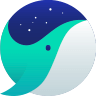
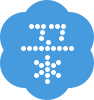

In [265]:
from bs4 import BeautifulSoup
import requests as rq

url = "http://www.naver.com" 

nav = rq.get(url)
html = nav.text
bs = BeautifulSoup(html,'lxml')
bs

In [266]:
span = bs.find_all('span')

import re

span = str(span)
span2 = re.findall('[가-힣]+',span)

span2 = ' '.join(span2)
span2

'뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 네이버 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 클래스를 추가해주세요 삭제 설정이 초기화 된다면 도움말 을 확인해주세요 설정이 초기화 된다면 도움말 을 확인해주세요 도움말 도움말 클래스를 추가해주세요 자동저장 끄기 클래스를 추가해주세요 자동저장 끄기 회차 당첨번호 추첨 지급기한 년 추첨 지급기한 년 원 원 날씨별 맑음 낮 맑음 밤 구름조금 낮 구름조금 밤 구름많음 낮 구름많음 밤 흐림 약한비 비 강한비 약한눈 눈 강한눈 진눈깨비 소나기 안개 소낙눈 번개뇌우 우박 황사 비또는눈 가끔비 가끔눈 가끔비또는눈 흐린후갬 뇌우후갬 비후갬 눈후갬 흐려져비 흐려져눈 날씨별 맑음 낮 맑음 밤 구름조금 낮 구름조금 밤 구름많음 낮 구름많음 밤 흐림 약한비 비 강한비 약한눈 눈 강한눈 진눈깨비 소나기 안개 소낙눈 번개뇌우 우박 황사 비또는눈 가끔비 가끔눈 가끔비또는눈 흐린후갬 뇌우후갬 비후갬 눈후갬 흐려져비 흐려져눈 바로가기 바로가기 추가 최근검색어 있으면 날짜 표시 추가 추가 클래스를 추가해주세요 클래스를 추가해주세요 자세히보기 도움말 신고 도움말 신고 클래스를 추가해주세요 자동완성 끄기 클래스를 추가해주세요 자동완성 끄기 쇼핑 쇼핑 최저기온 최고기온 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 개의 글 이전 다음 시간 전 한국경제 한국경제 일 전 다방 공식 포스트 다방 공식 포스트 일 전 어제 아시아경제 아시아경제 주일 전 살구뉴스 살구뉴스 재생 재생시간 재생시간 주일 전 한국경제 신속한 경제 증권 채널 한국경제 신속한 경제 증권 채널 재생 재생시간 재생시간 주일 전 한국경제 신속한 경제 증권 채널 한국경제 신속한 

#### 과제 0725_4

"http://www.naver.com" 사이트에서 span 태그에 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 출력하세요.

In [332]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = "http://www.naver.com" 

nav = rq.get(url)
html = nav.text
bs = BeautifulSoup(html,'lxml')

texts = bs.find_all('span')
li = []
for t in texts:
    li.append(t.get_text())
print(li)

['뉴스스탠드 바로가기', '주제별캐스트 바로가기', '타임스퀘어 바로가기', '쇼핑캐스트 바로가기', '로그인 바로가기', '매일 쓰는 브라우저 보안이 걱정된다면, 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.', '매일 쓰는 브라우저 보안이 걱정된다면, ', '다운로드', '네이버', '쥬니어네이버', '해피빈', '검색', '', '한글 입력기', '', '자동완성 레이어', '', '@txt@', '', '@txt@', '\n@date@.\n\n삭제\n', '설정이 초기화 된다면 도움말을 확인해주세요.', '설정이 초기화 된다면 도움말을 확인해주세요.', '\n도움말\n', '도움말', '\n\n\n자동저장 끄기\n\n', '\n\n자동저장 끄기\n', '', '@5@회차 당첨번호', '\n추첨 @13@.지급기한 1년\n', '추첨 @13@.', '지급기한 1년', '\n\n@6@@7@@8@@9@@10@@11@@12@\n\n', '\n@6@@7@@8@@9@@10@@11@@12@\n', '@14@', '@txt@@currency@', '@currency@', '\n@8@(@9@%)\n', '@8@(@9@%)', '\n@6@원\n', '@6@원', '', '@txt@', '\n@7@, @message@\n', '@7@, @message@', '\n\n\n@7@\n@8@°\n\n', '\n\n@7@\n@8@°\n', '@7@', '', '@txt@', '\n@5@\n', '@5@', '\n바로가기\n', '바로가기', '@txt@', '', '\n추가\n', '@txt@', '', '\n\n@date@.\n추가\n', '@query@ @intend@', '', '@intend@', '\n추가\n', '', '\n\n\n\n자세히보기\n', '', '\n도움말\n신고\n', '도움말', '신고', '\n\n\n자동완성 끄기\n\n', '\n\n자동완성 끄기\n', '쇼핑', '쇼핑LIVE', '23.0°', '33.0°', '이태원동', '이태원동', 

In [331]:
li = str(li)
li2 = re.sub('[^\w]',' ', li)
li2 = re.sub('[n]',' ',li2)
li2 = re.sub(' +',' ',li2)
li2

' 뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 네이버 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 txt txt date 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 5 회차 당첨번호 추첨 13 지급기한 1년 추첨 13 지급기한 1년 6 7 8 9 10 11 12 6 7 8 9 10 11 12 14 txt curre cy curre cy 8 9 8 9 6 원 6 원 txt 7 message 7 message 7 8 7 8 7 txt 5 5 바로가기 바로가기 txt 추가 txt date 추가 query i te d i te d 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑LIVE 23 0 33 0 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 671 개의 글 이전 다음 1개월 전 한경BP 한경BP 1개월 전 문학수첩 문학수첩 1개월 전 알에이치코리아 알에이치코리아 1개월 전 동양북스 동양북스 1개월 전 문예춘추사 문예춘추사 집계기간 2022 07 18 2022 07 24 제공 인터넷 교보문고 이전 다음 1위 위 2위 위 3위 위 4위 위 5위 위 6위 위 7위 위 8위 위 9위 위 10위 위 11위 위 12위 위 13위 위 14위 위 15위 위 16위 위 17위 위 18위 위 19위 위 20위 위 1개월 전 한겨레출판 한겨레출판 1개월 전 청림출판 청림출판 3주일 전 컬처블룸 컬처블룸 1개월 전 북라이프 북라이프 1개월 전 프네우마 프네우마 NAVER 이전 다음 코로나바이러스감염증 19 현황 하락6 14 0 53 하락 하락66 3

#### 과제 0725_5
"http://www.naver.com" 사이트에서 a 태그에 id가 있는 경우에 대하여 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 한줄에 출력하세요.

In [334]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = "http://www.naver.com"

naver = rq.get(url)
html = naver.text
bs = BeautifulSoup(html,'lxml')

atag = bs.find_all('a', id=True)
atag

[<a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>,
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="btn_keyboard" href="#" id="ke_kbd_btn" onclick="return false;" role="button"><span class="blind">한글 입력기</span><span class="ico_keyboard"></span></a>,
 <a aria-pressed="false" class="btn_arw _btn_arw fold" data-atcmp-element="" href="#" id="nautocomplete" role="button" tabindex="2"><span class="blind">자동완성 레이어</span><span class="ico_arr"></span></a>,
 <a class="btn_set" data-clk="tca.like" href="#" id="NM_THEME_EDIT_SET" role="button">관심주제 설정</a>,
 <a class="content_top" href="#wrap" id="NM_scroll_top_btn"><span class="blind">TOP</span></a>]

In [338]:
li = []
for a in atag:
    li.append(a.get_text())
print(li)

li = ' '.join(li)
li

['다운로드', '네이버를 시작페이지로', '한글 입력기', '자동완성 레이어', '관심주제 설정', 'TOP']


'다운로드 네이버를 시작페이지로 한글 입력기 자동완성 레이어 관심주제 설정 TOP'

#### 과제 0725_6

url = 'https://news.naver.com/' 사이트 p태그에서 class가 cjs_ht인 데이터를  한글만을 불필요한 공백을 제거한 후 출력하세요.

In [339]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = 'https://news.naver.com/'

naver = rq.get(url)
html = naver.text
bs = BeautifulSoup(html,'lxml')

uu = bs.find_all('p',{'class':'cjs_ht'})
uu

[<p class="cjs_ht">
                         
                             
                                 오늘 언론사가 발행한<br/>종이신문에 실린 뉴스 1면<br/>기사가 제공됩니다.
                             
                             
                         
                     </p>]

In [340]:
uu = str(uu)
uu2= re.findall('[가-힣]+', uu)
uu2 = ' '.join(uu2)
uu2

'오늘 언론사가 발행한 종이신문에 실린 뉴스 면 기사가 제공됩니다'